In [1]:
from duckduckgo_search import DDGS
from fastcore.all import *

ddgs = DDGS()

def search_images(term, max_images=30):
    print(f"Searching for '{term}'")
    return L(ddgs.images(keywords=term, max_results=max_images)).itemgot('image')

In [2]:
urls = search_images('birds')

urls[0]

Searching for 'birds'


'http://upload.wikimedia.org/wikipedia/commons/9/9b/Eastern_Bluebird-27527-2.jpg'

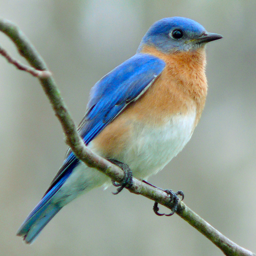

In [3]:
from fastdownload import download_url
dest = 'bird.jpg'
download_url(urls[0], dest, show_progress=False)
from fastai.vision.all import *
im = Image.open(dest)
im.to_thumb(256,256)

Searching for 'forest photos'


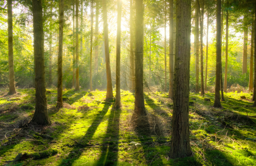

In [4]:
download_url(search_images('forest photos', max_images=1)[0], 'forest.jpg', show_progress=False)
Image.open('forest.jpg').to_thumb(256,256)


In [11]:
searches = 'forest','bird'
path = Path('bird_or_not')
from time import sleep
for o in searches:
    dest = (path/o)
    dest.mkdir(exist_ok=True, parents=True)
    download_images(dest, urls=search_images(f'{o} photo'))
    sleep(10) # Pause between searches to avoid over-loading server
    download_images(dest, urls=search_images(f'{o} sun photo'))
    sleep(10)
    download_images(dest, urls=search_images(f'{o} shade photo'))
    sleep(10)
    resize_images(path/o, max_size=400, dest=path/o)

Searching for 'forest photo'
Searching for 'forest sun photo'
Searching for 'forest shade photo'
Searching for 'bird photo'
Searching for 'bird sun photo'
Searching for 'bird shade photo'


In [12]:

failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

5

In [13]:
get_image_files((path))

(#714) [Path('bird_or_not/forest/6be07185-cb0e-45b2-b13b-738f9c0af980.jpg'),Path('bird_or_not/forest/1b8b1a25-1df7-4d92-9f01-4baa2f0903b5.jpg'),Path('bird_or_not/forest/d669fcc3-597b-41b2-80fd-e4f4ea04a707.jpg'),Path('bird_or_not/forest/f2da3a98-a1d4-473b-9e4f-038d3bb246fd.jpg'),Path('bird_or_not/forest/918cd67a-25ca-41cd-99fb-fc7f9d2ed653.jpg'),Path('bird_or_not/forest/9ad198c0-382c-4655-a917-b468b2ea2438.jpg'),Path('bird_or_not/forest/4cbf209f-f6e7-4259-9150-21f651b509a8.jpg'),Path('bird_or_not/forest/04605f97-c707-43ed-860c-15737f081050.jpg'),Path('bird_or_not/forest/18497386-3c07-4b8b-9f62-a7084a75a2ec.jpg'),Path('bird_or_not/forest/e31fd528-35cf-4690-bcab-0f522e3a7301.jpg')...]

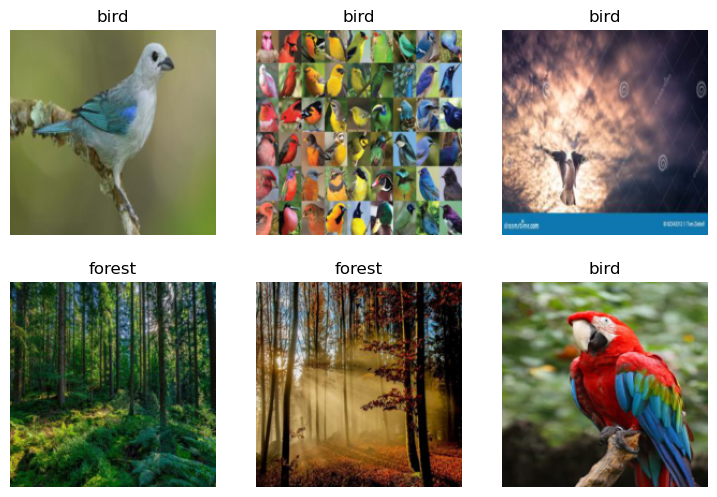

In [15]:
dls = DataBlock( blocks=(ImageBlock, CategoryBlock), get_items=get_image_files, splitter=RandomSplitter(valid_pct=0.2, seed=42), get_y=parent_label, item_tfms=[Resize(192, method='squish')] ).dataloaders(path)
dls.show_batch(max_n=6)

In [16]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(3)

epoch,train_loss,valid_loss,error_rate,time
0,1.123132,0.019398,0.014085,00:07


epoch,train_loss,valid_loss,error_rate,time
0,0.513173,0.142071,0.042254,00:08
1,0.368191,0.139845,0.035211,00:07
2,0.267191,0.094549,0.021127,00:07


In [21]:
is_bird,_,probs = learn.predict('bird.jpg')
print(f"This is a: {is_bird}.")
print(f"This is a: {_}.")
print(f"Probability it's a bird: {probs[0]:.4f}")

This is a: bird.
This is a: 0.
Probability it's a bird: 0.9832
